# Yield Curve Greeks and Delta: Theory and Mathematics

In this section, we explain the theoretical framework and mathematical derivations behind computing the Greeks (sensitivities) of a yield curve—specifically the delta resulting from small changes (or "shakes") in the yield curve market quotes. This process is often called a bump-and-revalue analysis.

---

## 1. Yield Curve Construction Recap

The yield curve relates time to maturity \( T \) to the discount factor \( P(0,T) \). Under continuous compounding, the discount factor is given by:

$$
P(0,T) = e^{-r(T) \, T}
$$

where \( r(T) \) is the continuously compounded yield at maturity \( T \).

To build the yield curve, we use market instruments (e.g., interest rate swaps) and set up the following condition for each instrument (assuming the instrument is at par):

$$
f_i(\mathbf{r}) = 0, \quad i = 1, 2, \ldots, N,
$$

where \( \mathbf{r} = \{r(T_1), r(T_2), \ldots, r(T_N)\} \) are the unknown yields (spine points).

These equations are solved numerically, typically via the **Newton-Raphson method**.

### Newton-Raphson Update

The yield vector is updated iteratively as follows:

$$
\mathbf{r}^{(n+1)} = \mathbf{r}^{(n)} - J^{-1} \, \mathbf{f}(\mathbf{r}^{(n)}),
$$

where the Jacobian matrix \( J \) is defined by:

$$
J_{ij} = \frac{\partial f_i}{\partial r_j}.
$$

In practice, these partial derivatives are approximated using finite differences:

$$
J_{ij} \approx \frac{f_i(r_j + \epsilon) - f_i(r_j)}{\epsilon}.
$$

---

## 2. Swap Pricing

For a **payer swap**, the swap price is typically computed as:

$$
S = \left[P(0,T_i) - P(0,T_m)\right] - K \sum_{j=1}^{n} \tau_j \, P(0,T_j),
$$

where:
- \( T_i \) is the swap's start date,
- \( T_m \) is the swap's maturity,
- \( K \) is the fixed (strike) rate,
- \( \tau_j \) is the year fraction for each payment period,
- \( P(0,T_j) \) are the discount factors obtained from the yield curve.

---

## 3. Yield Curve Greeks and Delta Calculation

### 3.1. Finite Difference Sensitivity (Delta)

To measure the sensitivity of the swap price \( S(K) \) to a small change in the market quote \( K \), we use the finite difference (bump-and-revalue) method. Specifically, if we increase \( K \) by a small amount \( dK \), the new swap price becomes \( S(K + dK) \). The delta is approximated by:

$$
\Delta \approx \frac{S(K + dK) - S(K)}{dK}.
$$

This equation quantifies the change in the swap price per unit change in \( K \).

### 3.2. Steps in the Bump-and-Revalue Method

1. **Calibrate the Yield Curve:**

   - Solve for the spine points \( \mathbf{r} \) using the market instruments with the original market quotes \( K \).
   - Compute the discount factors \( P(0,T) \) using:
     
     $$
     P(0,T) = e^{-r(T) \, T}.
     $$

2. **Compute the Base Swap Price:**

   - Price the swap using the calibrated yield curve to get the base price \( S(K) \).

3. **Bump the Market Quote:**

   - Increase one element of \( K \) by a small amount \( dK \).

4. **Recalibrate the Yield Curve:**

   - With the bumped market quote, re-calibrate the yield curve and obtain new discount factors \( P^{\text{bumped}}(0,T) \).

5. **Reprice the Swap:**

   - Calculate the new swap price \( S(K + dK) \) using the updated discount factors.

6. **Compute Delta:**

   - Use the finite difference formula:
     
     $$
     \Delta \approx \frac{S(K + dK) - S(K)}{dK}.
     $$

This process is repeated for each market quote \( K_i \) to generate a vector of delta values across the different maturities.

---

## 4. Importance of Yield Curve Greeks and Delta

- **Risk Management:**  
  Delta indicates how sensitive the swap price is to small changes in market quotes. This is crucial for hedging interest rate risk.

- **Model Calibration and Validation:**  
  By comparing the computed delta with market observations, practitioners can assess whether their yield curve calibration is accurate.

- **Pricing Adjustments:**  
  Understanding the Greeks allows for better adjustments in the model when market conditions change, thereby improving pricing accuracy.

---

## Summary of Key Formulas

1. **Discount Factor:**
   
   $$
   P(0,T) = e^{-r(T) \, T}
   $$

2. **Newton-Raphson Update:**
   
   $$
   \mathbf{r}^{(n+1)} = \mathbf{r}^{(n)} - J^{-1} \, \mathbf{f}(\mathbf{r}^{(n)}),
   $$
   with
   $$
   J_{ij} \approx \frac{f_i(r_j + \epsilon) - f_i(r_j)}{\epsilon}.
   $$

3. **Swap Price (Payer):**
   
   $$
   S = \left[P(0,T_i) - P(0,T_m)\right] - K \sum_{j=1}^{n} \tau_j \, P(0,T_j).
   $$

4. **Delta (Sensitivity):**
   
   $$
   \Delta \approx \frac{S(K + dK) - S(K)}{dK}.
   $$

---

This theoretical framework and these formulas provide the foundation for the "shake" or sensitivity analysis (Greek calculation) in yield curve modeling. Using these methods, practitioners can quantify how small changes in market inputs affect the pricing of interest rate derivatives, which is essential for risk management and hedging strategies.


index in the loop is 1  Error is  0.028851509690048977
index in the loop is 2  Error is  0.0019613388462090932
index in the loop is 3  Error is  3.872434204750031e-05
index in the loop is 4  Error is  1.536926839443385e-08
index in the loop is 5  Error is  2.3019492734947767e-12
index in the loop is 6  Error is  3.4750819751847816e-16

 spine point are [0.00013334 0.00022861 0.00028193 0.00042676 0.00047485 0.00041624
 0.0002818  0.00019383] 

Swap price=  -0.02258107820188271
index in the loop is 1  Error is  0.028850353638953947
index in the loop is 2  Error is  0.0019613381098598087
index in the loop is 3  Error is  3.872434491531132e-05
index in the loop is 4  Error is  1.5369271002966452e-08
index in the loop is 5  Error is  2.3019496338733725e-12
index in the loop is 6  Error is  3.4955682691794626e-16
index in the loop is 1  Error is  0.028851011271675588
index in the loop is 2  Error is  0.001961337462052622
index in the loop is 3  Error is  3.8724342046398065e-05
index in the 

0.0

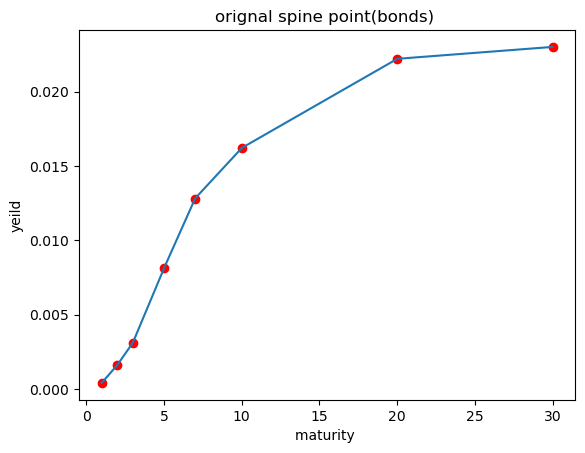

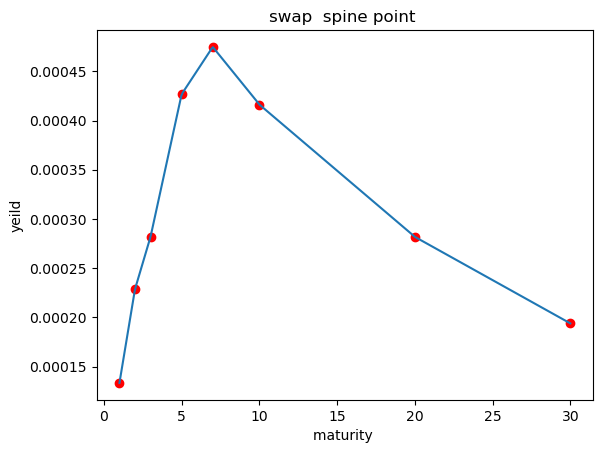

In [1]:
import numpy as np
import enum
from copy import deepcopy
from scipy.interpolate import splrep, splev, interp1d
import seaborn as sns
import matplotlib.pyplot as plt


class OptionTypeSwap(enum.Enum):
    RECEIVER = 1.0
    PAYER = -1.0


def IRSwap(CP, notional, K, t, Ti, Tm, n, P0T):
    # CP- payer of receiver
    # n- notional
    # K- strike
    # t- today's date
    # Ti- beginning of the swap
    # Tm- end of Swap
    # n- number of dates payments between Ti and Tm
    # r_t -interest rate at time t
    ti_grid = np.linspace(Ti, Tm, int(n))
    tau = ti_grid[1] - ti_grid[0]
    prevTi = ti_grid[np.where(ti_grid < t)]
    if np.size(prevTi) > 0:
        Ti = prevTi[-1]

    # handel the case if some payment is alread y done
    ti_grid = ti_grid[np.where(ti_grid > t)]
    temp = 0.0

    for (idx, ti) in enumerate(ti_grid):

        if ti > Ti:
            temp = temp + tau * P0T(ti);
        P_t_Ti = P0T(Ti)
        P_t_Tm = P0T(Tm)

        if CP == OptionTypeSwap.PAYER:
            swap = (P_t_Ti - P_t_Tm) - K * temp
        elif CP == OptionTypeSwap.RECEIVER:
            swap = K * temp - (P_t_Ti - P_t_Tm)

        return swap * notional


def P0TModel(t, ti, ri, method):
    rInterp = method(ti, ri)
    if t >= ti[-1]:
        r = ri[-1]
    if t <= ti[0]:
        r = ri[0]
    if t > ti[0] and t < ti[-1]:
        r = rInterp(t)

    return np.exp(-r * t)


def YiedCurve(instruments, maturities, r0, method, tol):
    r0 = deepcopy(r0)
    ri = MultivariateNewtonRaphson(r0, maturities, instruments, method, tol=tol)
    return ri


def MultivariateNewtonRaphson(ri, ti, instruments, method, tol):
    err = 10e10
    idx = 0
    while err > tol:
        idx = idx + 1
        values = EvaluateInstruments(ti, ri, instruments, method)
        J = Jacobian(ti, ri, instruments, method)
        J_inv = np.linalg.inv(J)
        err = - np.dot(J_inv, values)
        ri[0:] = ri[0:] + err
        err = np.linalg.norm(err)
        print('index in the loop is', idx, ' Error is ', err)
    return ri


def Jacobian(ti, ri, instruments, method):
    eps = 1e-05
    swap_num = len(ti)
    J = np.zeros([swap_num, swap_num])
    val = EvaluateInstruments(ti, ri, instruments, method)
    ri_up = deepcopy(ri)

    for j in range(0, len(ri)):
        ri_up[j] = ri_up[j] + eps
        val_up = EvaluateInstruments(ti, ri_up, instruments, method)
        ri_up[j] = ri[j]
        dv = (val_up - val) / eps
        J[:, j] = dv[:]
    return J


def EvaluateInstruments(ti, ri, instruments, method):
    P0Ttemp = lambda t: P0TModel(t, ti, ri, method)
    val = np.zeros(len(instruments))
    for i in range(0, len(instruments)):
        val[i] = instruments[i](P0Ttemp)
    return val


def linear_interpolation(ti, ri):
    interpolator = lambda t: np.interp(t, ti, ri)
    return interpolator


def quadratic_interpolation(ti, ri):
    interpolator = interp1d(ti, ri, kind='quadratic')
    return interpolator


def cubic_interpolation(ti, ri):
    interpolator = interp1d(ti, ri, kind='cubic')
    return interpolator


def BuildInstruments(K, mat):
    swap1 = lambda P0T: IRSwap(OptionTypeSwap.PAYER, 1, K[0], 0.0, 0.0, mat[0], 4 * mat[0], P0T)
    swap2 = lambda P0T: IRSwap(OptionTypeSwap.PAYER, 1, K[1], 0.0, 0.0, mat[1], 4 * mat[1], P0T)
    swap3 = lambda P0T: IRSwap(OptionTypeSwap.RECEIVER, 1, K[2], 0.0, 0.0, mat[2], 4 * mat[2], P0T)
    swap4 = lambda P0T: IRSwap(OptionTypeSwap.PAYER, 1, K[3], 0.0, 0.0, mat[3], 4 * mat[3], P0T)
    swap5 = lambda P0T: IRSwap(OptionTypeSwap.PAYER, 1, K[4], 0.0, 0.0, mat[4], 4 * mat[4], P0T)
    swap6 = lambda P0T: IRSwap(OptionTypeSwap.RECEIVER, 1, K[5], 0.0, 0.0, mat[5], 4 * mat[5], P0T)
    swap7 = lambda P0T: IRSwap(OptionTypeSwap.PAYER, 1, K[6], 0.0, 0.0, mat[6], 4 * mat[6], P0T)
    swap8 = lambda P0T: IRSwap(OptionTypeSwap.PAYER, 1, K[7], 0.0, 0.0, mat[7], 4 * mat[7], P0T)
    instruments = [swap1, swap2, swap3, swap4, swap5, swap6, swap7, swap8]
    return instruments


def mainCode():
    tol = 1.0e-15
    r0 = np.array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])
    # cCOnstruction of yeild curve
    K = np.array([0.04 / 100.0, 0.16 / 100.0, 0.31 / 100.0, 0.81 / 100.0, 1.28 / 100.0, 1.62 / 100.0, 2.22 / 100.0,
                  2.30 / 100.0])
    mat = np.array([1.0, 2.0, 3.0, 5.0, 7.0, 10.0, 20.0, 30.0])
    # orignal yeild curve

    t_line = np.linspace(mat.min(), mat.max(), 300)
    K_cont = np.interp(t_line, mat, K)
    plt.figure(1)
    plt.plot(t_line, K_cont)
    plt.scatter(mat, K, c='r')
    plt.title("orignal spine point(bonds) ")
    plt.xlabel("maturity ")
    plt.ylabel("yeild")
    method = linear_interpolation

    instruments = BuildInstruments(K, mat)
    # determining optimal spine point
    ri = YiedCurve(instruments, mat, r0, method, tol)
    print('\n spine point are', ri, '\n')
    P0T = lambda t: P0TModel(t, mat, ri, method)
    t_line = np.linspace(mat.min(), mat.max(), 300)
    r_cont = np.interp(t_line, mat, ri)
    plt.figure(2)
    plt.plot(t_line, r_cont)
    plt.scatter(mat, ri, c='r')
    plt.title("swap  spine point ")
    plt.xlabel("maturity ")
    plt.ylabel("yeild")

    # off amrket swap
    SwapLambda = lambda P0T: IRSwap(OptionTypeSwap.PAYER, 1, 0.03, 0.0, 0.0, 4, 6 * mat[0], P0T)
    swap = SwapLambda(P0T)
    print('Swap price= ', swap)
    dk = 0.00001
    delta = np.zeros(len(K))
    K_new = K
    for i in range(0, len(K)):
        K_new[i] = K_new[i] + dk
        instruments = BuildInstruments(K_new, mat)
        ri = YiedCurve(instruments, mat, r0, method, tol)
        P0T_new = lambda t: P0TModel(t, mat, ri, method)
        swap_shock = SwapLambda(P0T_new)
        delta[i] = (swap_shock - swap) / dk
        K_new[i] = K_new[i] - dk

    for i in range(len(mat)):
        print(f"Maturity: {mat[i]} years, Delta: {delta[i]:.6f}")
    return 0.0


mainCode()















